In [ ]:
# menghubungkan google drive dengan google colab
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#mengimport semua yang diperlukan untuk kebutuhan KNN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# membaca data csv dan menampilkan 5 data teratas
data = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


gender = menjelaskan jenis kelamin, age = merupakan umur, hypertensi = riwayat tekanan darah, heart disease = riwayat penyakit jantung, smoking = menjelaskan berdasarkan riwayat merokok, bmi = body mass Index merupakan hitungan dari berat badan dengan tinggi badan, HbA1c level = merupakan Hemoglobin dalam darah, blood_glucose_level = merupakan angka gula darah, diabete = ini merupakan target yang menunjukan apakah diabeter(1) atau tidak(0)

In [ ]:
# melihat jumlah baris dan columns pada dataset
data.shape

(100000, 9)

In [ ]:
# melihat info ringkasan mengenai dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# melihat data yang missing value?
data.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
#melihat data yang duplikat
data.duplicated().sum()

3854

In [ ]:
#melihat data null
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
#melihat jumlah nilai unik pada data
data.nunique()

,0
gender,3
age,102
hypertension,2
heart_disease,2
smoking_history,6
bmi,4247
HbA1c_level,18
blood_glucose_level,18
diabetes,2


In [ ]:
# melihat statistik data
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
# menghapus data yang missing value dan
data = data.dropna()

In [ ]:
# menghapus data yang duplikat
data.drop_duplicates(inplace=True)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

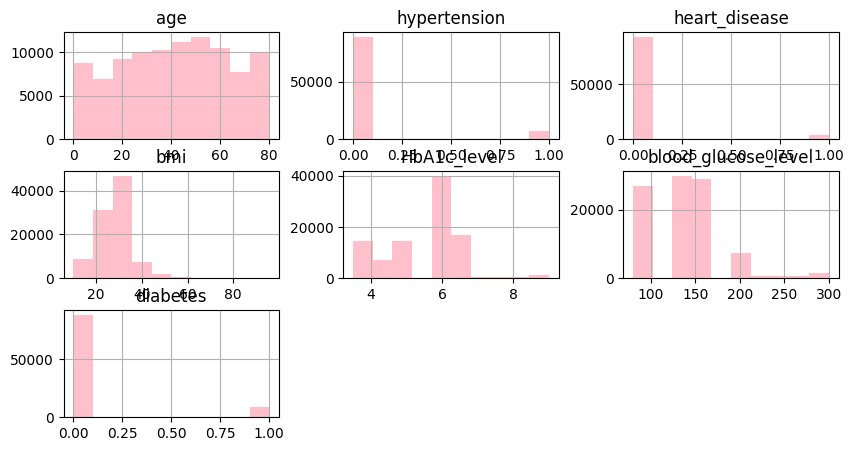

In [ ]:
# melihat distribusi data tiap variabel numerik
data.hist(figsize=(10, 5), color='pink')

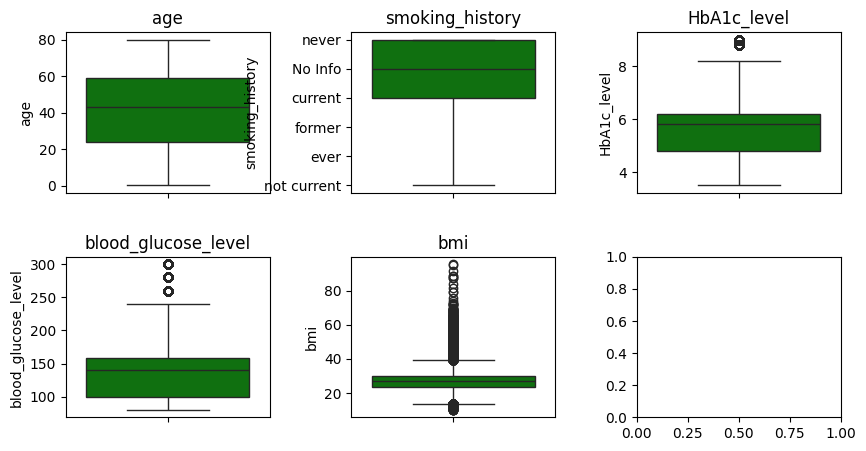

In [ ]:
# cek data outlier
def boxplot(data):
  variables = ['age','smoking_history',  'HbA1c_level', 'blood_glucose_level', 'bmi']

  fig, axes = plt.subplots(2, 3, figsize=(10, 5))
  fig.subplots_adjust(hspace=0.4, wspace=0.4)

  for i, var in enumerate(variables):
    row, col = i // 3, i%3
    sns.boxplot(y=var, data=data, color='green', ax=axes[row, col])
    axes[row, col].set_title(var)

  plt.show()

boxplot(data)

Apa itu data Outlier ? data outlier adalah nilai data yang berbeda dari data biasanya / berbeda dari nilai data yang lain.

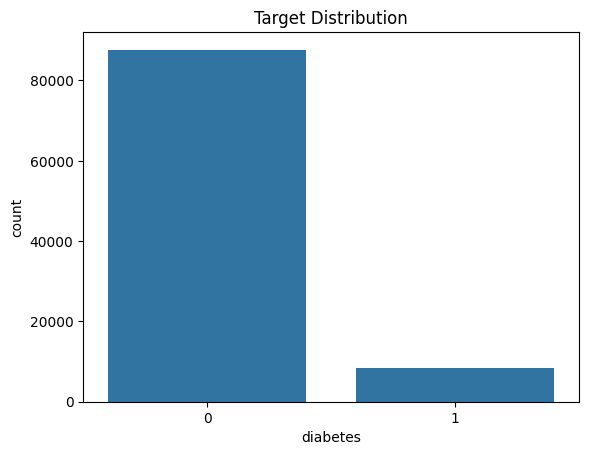

In [ ]:
# Melihat distribusi data kolom target
sns.countplot(x='diabetes', data=data)
plt.title('Target Distribution');

In [ ]:
# menghapus data outlier
def remove_outlier(data, variables):

    cleaned_data = data.copy()
    for column in variables:
        if column in cleaned_data.columns and cleaned_data[column].dtype in ['int64', 'float64']:
            Q1 = cleaned_data[column].quantile(0.25)
            Q3 = cleaned_data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            cleaned_data = cleaned_data[
                (cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)
            ]

    return cleaned_data

In [ ]:
# proses encoding mengubah data dari string ke numeric
le = LabelEncoder()

data['gender'] = le.fit_transform(data['gender'])
data['smoking_history'] = le.fit_transform(data['smoking_history'])


In [ ]:
# melihat ringkasan informasi dari data yang dimiliki
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int64  
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int64  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 7.3 MB


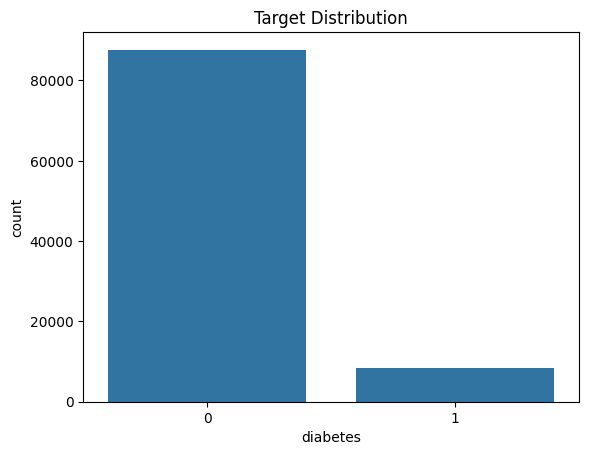

In [ ]:
# melihat distribusi data kolom target
sns.countplot(x='diabetes', data=data,)
plt.title('Target Distribution');

In [ ]:
# memisahkan features (independet variables) dari target (dependent variable)
X = data.drop(columns='diabetes')
y = data['diabetes']

In [ ]:
# standarisasi fitur (menyamakan skala data features)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# membagi data menjadi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Text(0, 0.5, 'Error Rate')

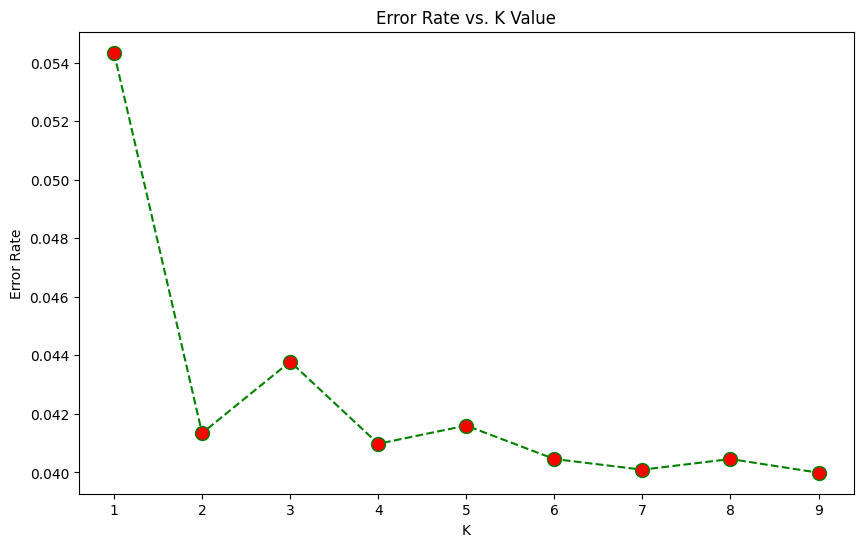

In [ ]:
# menentukan nilai terbaik untuk parameter K (tetangga)
error_rate = []

for i in range (1,10):
      knn = KNeighborsClassifier(n_neighbors=i)
      knn.fit(x_train, y_train)
      pred_i = knn.predict(x_test)
      error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(10,6))
plt.plot(range(1,10), error_rate, color='green', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

untuk menentukan nilai k dengan cara melihat grafik dengan error rate paling rendah dan K harus berjumlah Ganjil

In [ ]:
# proses modeiling
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [ ]:
# mengecek akurasi data,  precision, recall, dan F1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17509
           1       0.93      0.60      0.73      1721

    accuracy                           0.96     19230
   macro avg       0.95      0.80      0.85     19230
weighted avg       0.96      0.96      0.96     19230



<Axes: >

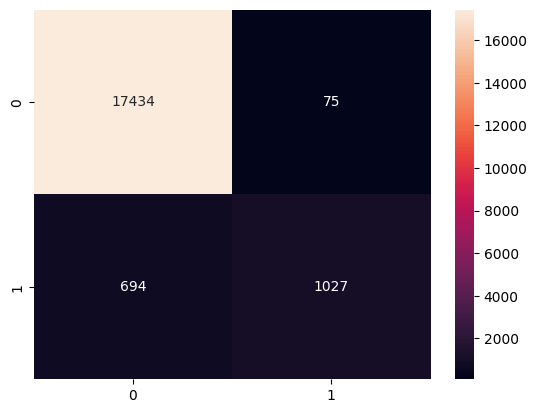

In [ ]:
#membuat headmap untuk evaluasi model klasifikasi
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

<Axes: xlabel='diabetes', ylabel='count'>

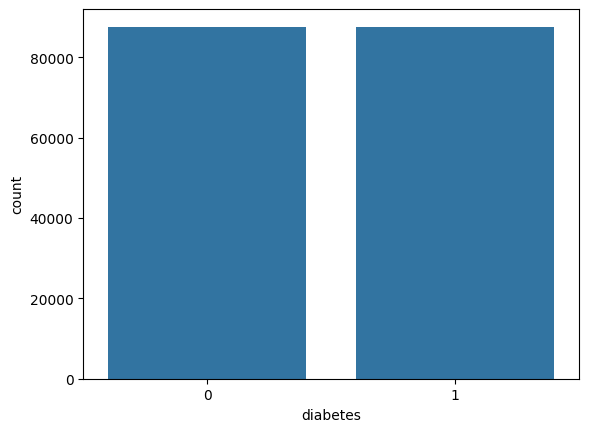

In [ ]:
# melakukan oversampling pada kolom target
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_sm, y_sm = sm.fit_resample(X, y)

sns.countplot(x=y_sm)

oversampling yaitu menyamakan data berdasarkan data tertinggi. Dan Undersampling yaitu menyamakan data berdasar data terrendah. kita lakukan ini ketika data tidak seimbang menjadi seimbang (balance)

In [ ]:
# menampilkan nilai unik pada kolom target
y_sm.value_counts()

,count
diabetes,
0,87664
1,87664


In [ ]:
# splitting/membagi menjadi 2 data dengan membagi 80% data training dan 20% data testing
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm, y_sm, test_size=0.2, random_state=42)

In [ ]:
# proses modelling
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_sm, y_train_sm)
y_pred_sm = knn.predict(x_test_sm)
print(classification_report(y_test_sm, y_pred_sm))


              precision    recall  f1-score   support

           0       0.99      0.93      0.96     17439
           1       0.93      0.99      0.96     17627

    accuracy                           0.96     35066
   macro avg       0.96      0.96      0.96     35066
weighted avg       0.96      0.96      0.96     35066



<Axes: >

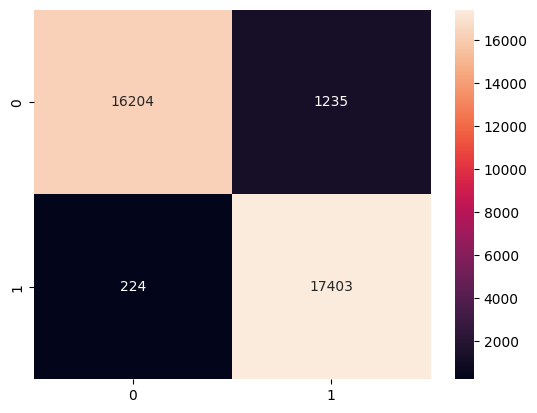

In [ ]:
# Membuat heatmap untuk evaluasi model klasifikasi
cm = confusion_matrix(y_test_sm, y_pred_sm)
sns.heatmap(cm, annot=True, fmt='d')